<a href="https://colab.research.google.com/github/thousif258369/pfsinterns/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
from google.colab import files

uploaded = files.upload()  # This will open a file picker to upload your dataset

# Load the data into a pandas DataFrame
data = pd.read_csv('creditcard.csv')
print(data.head())  # Display the first few rows of the dataset

Saving creditcard.csv to creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

In [ ]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Standardize 'Amount' and 'Time' columns
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))


In [ ]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE for handling class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f'Original dataset shape: {X.shape}, {y.shape}')
print(f'Resampled dataset shape: {X_res.shape}, {y_res.shape}')

Original dataset shape: (284807, 30), (284807,)
Resampled dataset shape: (568630, 30), (568630,)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [27]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

AttributeError: 'NoneType' object has no attribute 'tree_'

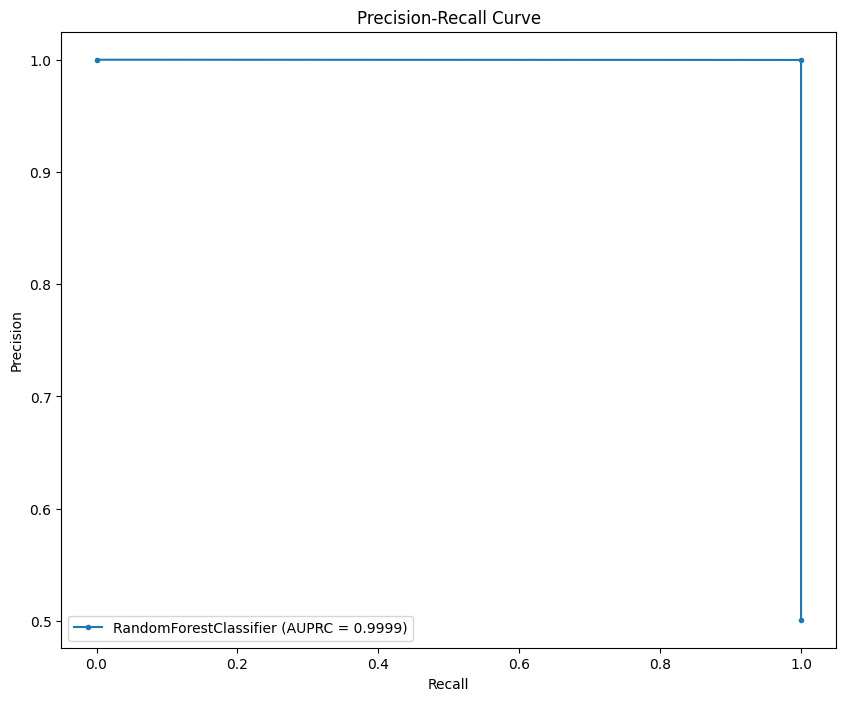

In [28]:
# Define a function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUPRC = {auc_score:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('Precision-Recall Curve')

# Plot the Precision-Recall curve for each model
plt.figure(figsize=(10, 8))
for model in [rf, gb, xgb]:
    y_pred = model.predict(X_test)
    plot_precision_recall_curve(y_test, y_pred, model.__class__.__name__)
plt.show()

In [17]:
import joblib

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [18]:
import joblib

# Load the saved model (choose one depending on which model you want to test)
model_rf = joblib.load('random_forest_model.pkl')  # Load Random Forest model
model_gb = joblib.load('gradient_boosting_model.pkl')  # Load Gradient Boosting model
model_xgb = joblib.load('xgboost_model.pkl')  # Load XGBoost model

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example new input data (replace these values with actual data)
# Example new input data
new_data = pd.DataFrame({
    'Time': [0],
    'V1': [-1.359807134],
    'V2': [-0.072781173],
    'V3': [2.536346738],
    'V4': [1.378155224],
    'V5': [-0.33832077],
    'V6': [0.462387778],
    'V7': [0.239598554],
    'V8': [0.098697901],
    'V9': [0.36378697],
    'V10': [0.090794172],
    'V11': [-0.551599533],
    'V12': [-0.617800856],
    'V13': [-0.991389847],
    'V14': [-0.311169354],
    'V15': [1.468176972],
    'V16': [-0.470400525],
    'V17': [0.207971242],
    'V18': [0.02579058],
    'V19': [0.40399296],
    'V20': [0.251412098],
    'V21': [-0.018306778],
    'V22': [0.277837576],
    'V23': [-0.11047391],
    'V24': [0.066928075],
    'V25': [0.128539358],
    'V26': [-0.189114844],
    'V27': [0.133558377],
    'V28': [-0.021053053],
    'Amount': [149.62]
})

# Make a prediction for the new data
new_prediction = model.predict(new_data)
new_prediction_proba = model.predict_proba(new_data)[:, 1]  # Probability of fraud

print(f"Predicted Class: {new_prediction[0]} (1 indicates fraud, 0 indicates non-fraud)")
print(f"Probability of Fraud: {new_prediction_proba[0]:.4f}")

IndexError: list index out of range

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
import numpy as np

In [21]:
# Assuming you have a trained model (e.g., clf for classifier)
y_pred = model.predict(X_test)  # Replace `model` with your actual model name
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class (fraud)

IndexError: list index out of range

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

NameError: name 'y_pred' is not defined

In [23]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

NameError: name 'y_pred' is not defined

In [ ]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute AUPRC
auprc = auc(recall, precision)
print(f'Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}')


--- Basic Dataset Information ---
Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Summary Statistics:
                Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.107626e-16  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std    1.000002e+00  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min   -1.996583e+00 -5.640751e+01 -7.271573

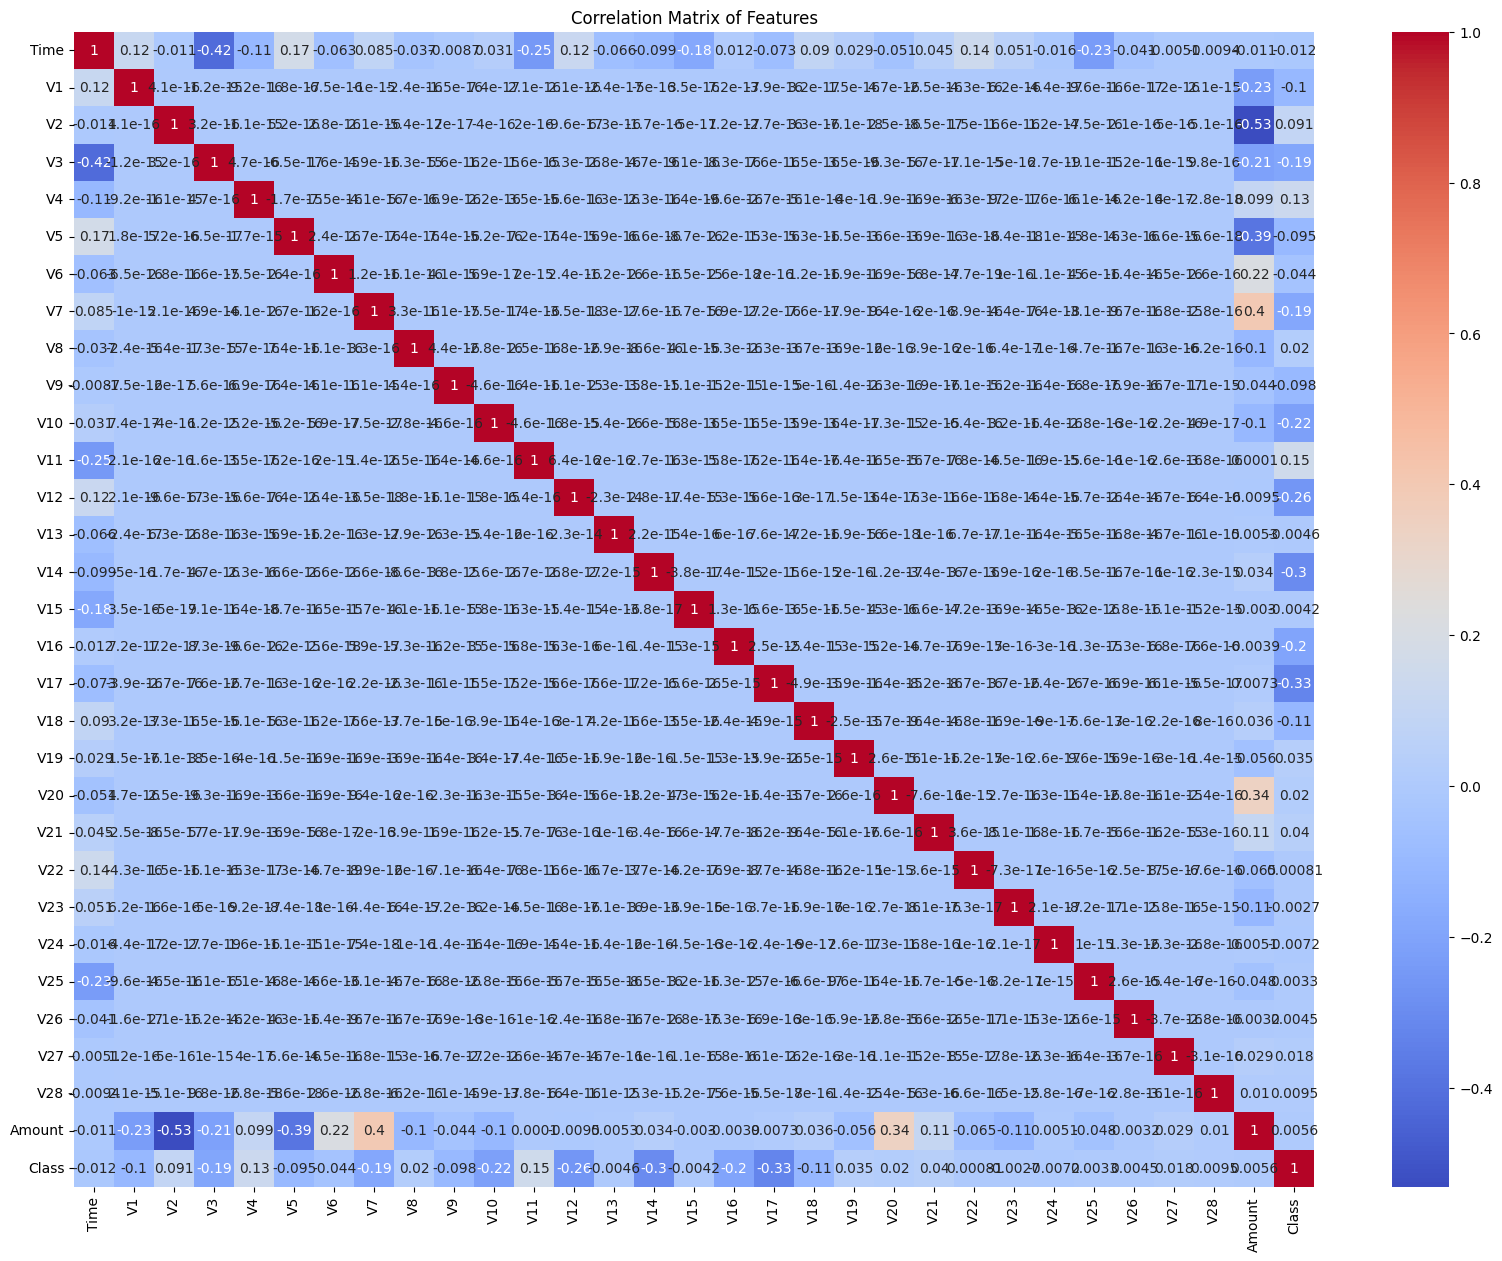


--- Class Distribution ---


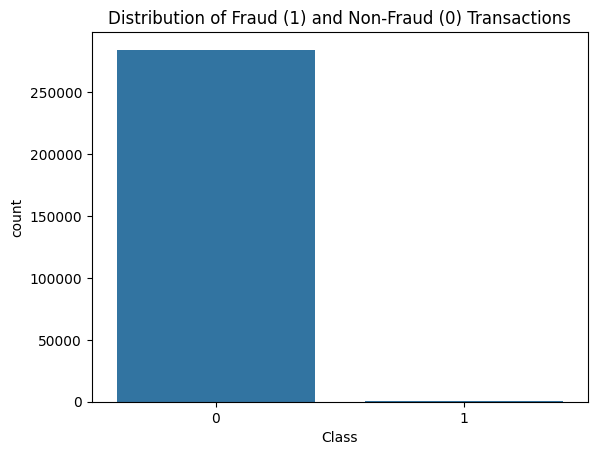

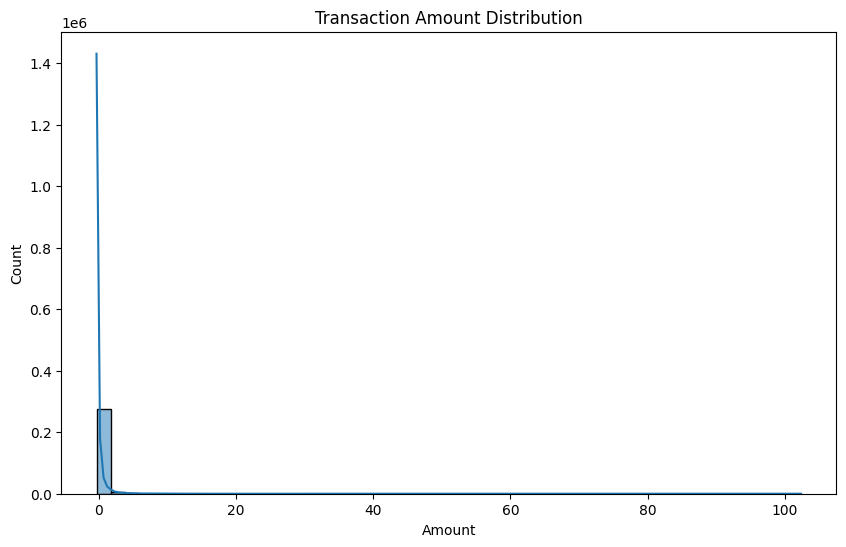

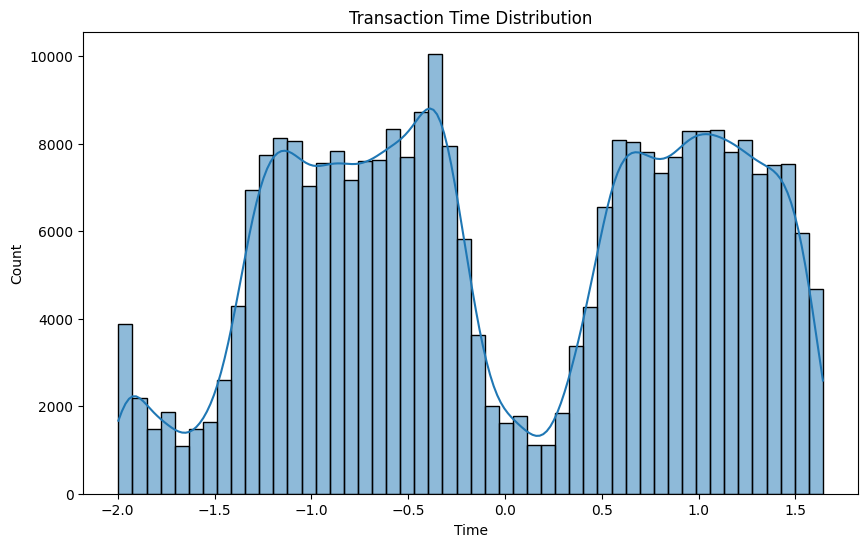


--- Feature Distribution Analysis ---


IndexError: index 7 is out of bounds for axis 0 with size 7

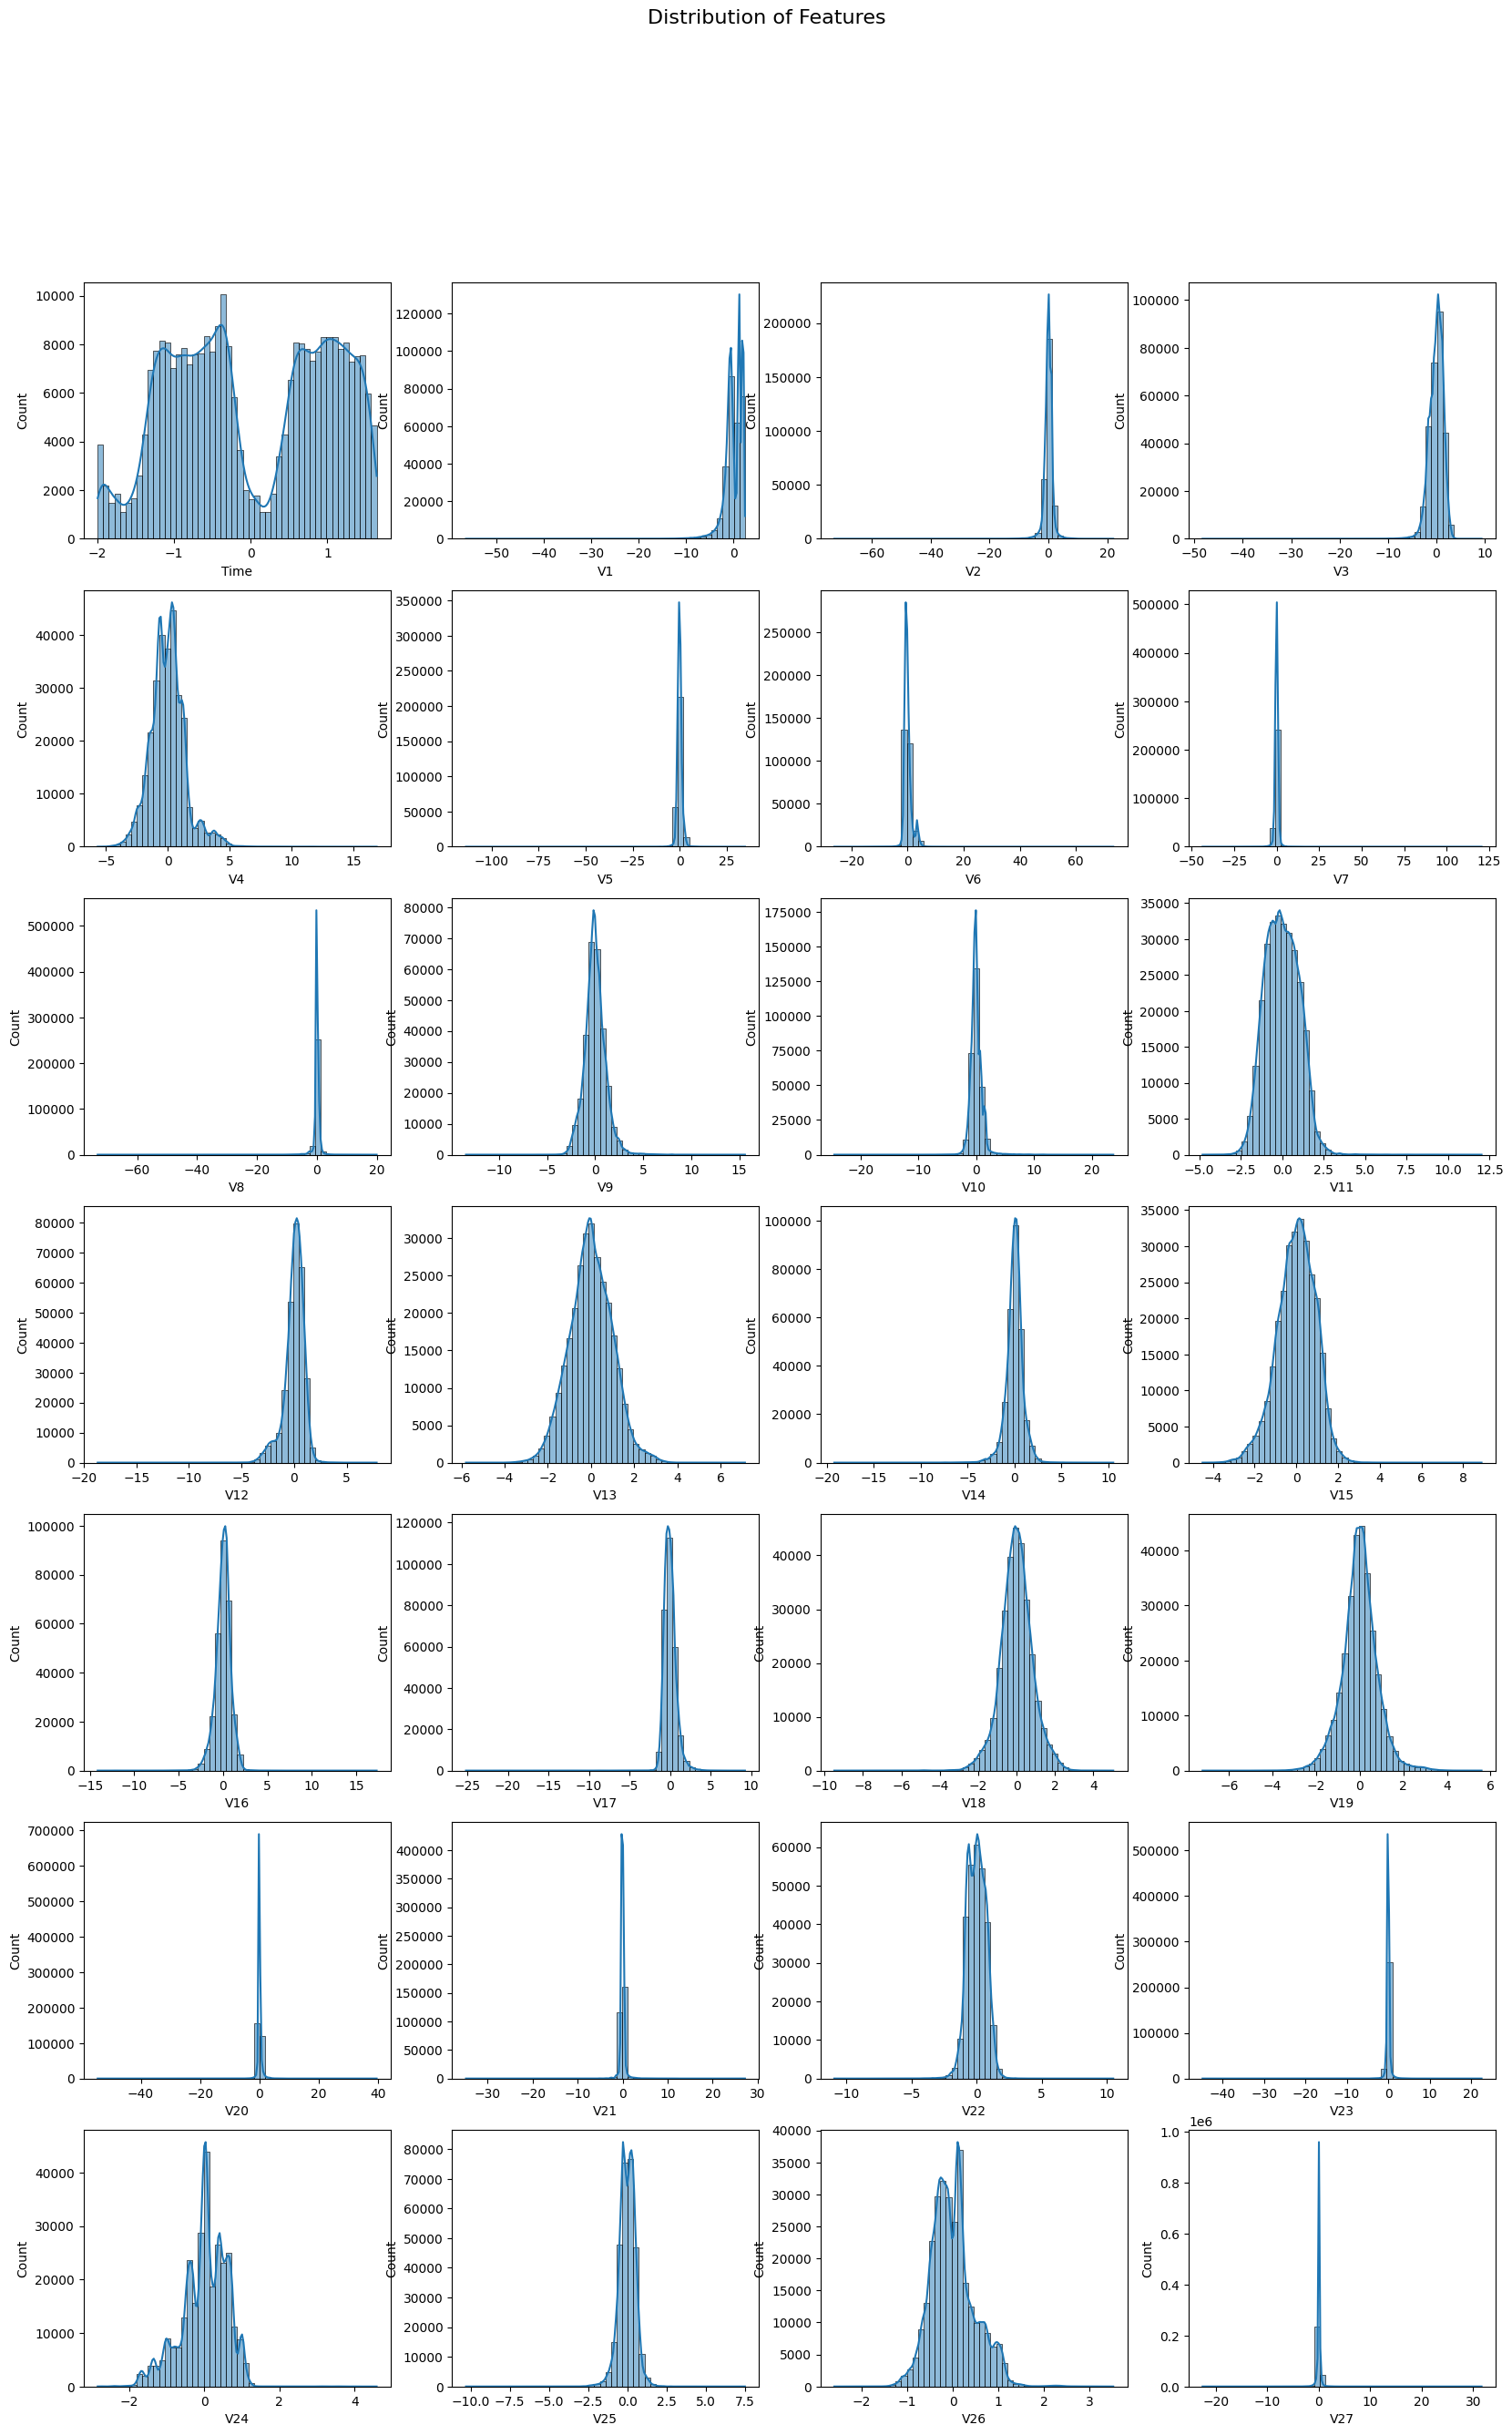

In [25]:
# Import necessary libraries for additional analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

# Basic Dataset Information
print("\n--- Basic Dataset Information ---")
print("Data Types:\n", data.dtypes)  # Data types of each column
print("Summary Statistics:\n", data.describe())  # Summary statistics

# Correlation Analysis
print("\n--- Correlation Matrix ---")
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Plot Distribution of Classes
print("\n--- Class Distribution ---")
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraud (1) and Non-Fraud (0) Transactions')
plt.show()

# Plot Distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Plot Distribution of 'Time'
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

# Analyze Distribution of Each Feature
print("\n--- Feature Distribution Analysis ---")
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 30))
fig.suptitle('Distribution of Features', fontsize=16)
for idx, col in enumerate(data.columns):
    if col != 'Class':
        sns.histplot(data[col], bins=50, ax=axes[idx // 4, idx % 4], kde=True)
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)
print("\n--- Principal Component Analysis (PCA) ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Transaction Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Isolation Forest for Anomaly Detection
print("\n--- Anomaly Detection using Isolation Forest ---")
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
outliers = isolation_forest.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers, palette='coolwarm')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# KMeans Clustering Analysis
print("\n--- KMeans Clustering Analysis ---")
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='coolwarm')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()